In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('query.csv')


In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-24T00:38:44.840Z,28.665900,52.133600,10.000,4.80,mb,67.0,51.0,5.1920,0.61,...,2024-10-24T00:51:05.040Z,"47 km WSW of Fīrūzābād, Iran",earthquake,6.32,1.894,0.055,102.0,reviewed,us,us
1,2024-10-23T23:07:17.140Z,40.167332,-121.286003,-0.930,2.58,md,18.0,124.0,0.1825,0.21,...,2024-10-23T23:17:16.899Z,"11 km WSW of Almanor, CA",earthquake,0.69,12.500,0.120,16.0,automatic,nc,nc
2,2024-10-23T22:49:33.182Z,41.053000,78.738900,10.000,4.00,mb,15.0,193.0,2.3390,0.56,...,2024-10-23T23:07:59.040Z,"117 km W of Aykol, China",earthquake,9.63,1.993,0.211,6.0,reviewed,us,us
3,2024-10-23T22:36:00.656Z,-24.322100,-67.091900,180.323,4.50,mb,31.0,75.0,1.6890,0.85,...,2024-10-23T22:59:46.040Z,"79 km W of San Antonio de los Cobres, Argentina",earthquake,9.30,7.478,0.124,19.0,reviewed,us,us
4,2024-10-23T21:30:10.973Z,-27.821500,-176.616400,10.000,5.10,mb,71.0,69.0,1.8290,0.95,...,2024-10-23T22:00:18.040Z,Kermadec Islands region,earthquake,9.76,1.540,0.052,120.0,reviewed,us,us


In [6]:
df.columns


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [7]:
df.shape


(1182, 22)

In [8]:
df.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1182.000000,1182.000000,1182.000000,1182.000000,1021.000000,1021.000000,1020.000000,1182.000000,1007.00000,1182.000000,1007.000000,1016.000000
mean,21.040139,-45.097201,64.204824,3.890694,43.196866,128.547767,2.214564,0.618208,6.77200,5.488488,0.116225,43.691929
std,31.310672,116.451303,111.664360,0.901672,33.586141,69.709477,3.243829,0.318700,4.51239,35.164273,0.075571,62.188515
min,-60.711200,-179.945900,-1.480000,2.500000,3.000000,12.000000,0.000000,0.000000,0.07000,0.000000,0.000000,1.000000
25%,-3.207650,-144.924975,10.000000,3.000000,20.000000,72.000000,0.378350,0.360000,2.71500,1.192500,0.069000,12.000000
50%,19.169033,-73.477950,15.230000,4.200000,33.000000,117.000000,1.187000,0.640000,7.08000,1.967000,0.099000,23.000000
75%,45.227225,71.227775,63.698500,4.600000,57.000000,174.000000,2.758000,0.840000,10.11500,6.874000,0.143622,47.000000
max,80.287000,179.991500,629.523000,6.600000,240.000000,347.000000,29.784000,1.770000,28.45000,1185.700000,0.800000,595.000000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1182 non-null   object 
 1   latitude         1182 non-null   float64
 2   longitude        1182 non-null   float64
 3   depth            1182 non-null   float64
 4   mag              1182 non-null   float64
 5   magType          1182 non-null   object 
 6   nst              1021 non-null   float64
 7   gap              1021 non-null   float64
 8   dmin             1020 non-null   float64
 9   rms              1182 non-null   float64
 10  net              1182 non-null   object 
 11  id               1182 non-null   object 
 12  updated          1182 non-null   object 
 13  place            1182 non-null   object 
 14  type             1182 non-null   object 
 15  horizontalError  1007 non-null   float64
 16  depthError       1182 non-null   float64
 17  magError      

In [10]:
df.iloc[0]

time                   2024-10-24T00:38:44.840Z
latitude                                28.6659
longitude                               52.1336
depth                                      10.0
mag                                         4.8
magType                                      mb
nst                                        67.0
gap                                        51.0
dmin                                      5.192
rms                                        0.61
net                                          us
id                                   us7000nms2
updated                2024-10-24T00:51:05.040Z
place              47 km WSW of Fīrūzābād, Iran
type                                 earthquake
horizontalError                            6.32
depthError                                1.894
magError                                  0.055
magNst                                    102.0
status                                 reviewed
locationSource                          

In [17]:
alert = df[df['mag']>4]
alert[alert['place'].str.contains('Iran')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-24T00:38:44.840Z,28.6659,52.1336,10.000,4.8,mb,67.0,51.0,5.192,0.61,...,2024-10-24T00:51:05.040Z,"47 km WSW of Fīrūzābād, Iran",earthquake,6.32,1.894,0.055,102.0,reviewed,us,us
183,2024-10-17T22:37:23.702Z,37.6257,54.2282,47.547,4.1,mb,18.0,195.0,3.096,0.80,...,2024-10-20T21:00:41.040Z,"88 km NNW of Gorgān, Iran",earthquake,15.87,10.001,0.131,16.0,reviewed,us,us
253,2024-10-16T12:26:21.209Z,33.2150,48.2756,10.000,4.3,mb,39.0,218.0,2.844,0.83,...,2024-10-16T14:44:03.040Z,"31 km SSW of Khorramabad, Iran",earthquake,11.02,1.978,0.100,28.0,reviewed,us,us
700,2024-10-05T19:15:34.362Z,35.3597,52.8989,10.000,4.5,mb,52.0,142.0,4.934,0.81,...,2024-10-07T22:46:32.382Z,"50 km WSW of Semnan, Iran",earthquake,11.10,1.931,0.092,35.0,reviewed,us,us
728,2024-10-05T03:29:26.129Z,32.3247,56.4756,10.000,4.1,mb,20.0,128.0,7.356,0.66,...,2024-10-05T03:49:35.005Z,"121 km NNW of Rāvar, Iran",earthquake,7.84,1.959,0.101,27.0,reviewed,us,us


In [18]:
df.groupby('magSource').mean('mag')

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
magSource,,,,,,,,,,,,
ak,63.543736,-147.595881,30.414741,2.924691,18.000000,338.000000,1.304000,0.635123,14.030000,9.675549,NaN,NaN
av,52.077944,-56.732333,5.446667,2.903333,9.666667,238.333333,0.112223,0.136667,1.303333,1.473333,0.257770,10.666667
ci,33.986838,-117.108644,9.946486,2.928919,68.513514,66.189189,0.166324,0.215135,0.260000,4.050270,0.167727,105.243243
guc,-21.966025,-69.064550,127.520250,4.175000,21.250000,157.000000,1.070000,0.640000,8.070000,7.227000,NaN,NaN
hv,19.354706,-155.615922,24.197059,2.782353,48.647059,167.941176,0.145689,0.167647,0.642353,0.682941,0.229550,29.235294
mb,46.945000,-112.656500,11.610000,2.510000,15.000000,91.000000,0.010410,0.110000,0.360000,0.470000,0.225016,39.000000
nc,38.624033,-121.974845,8.310000,2.887667,61.833333,94.800000,0.152547,0.144333,0.443000,4.987333,0.191400,55.700000
nm,36.475583,-90.139375,9.480000,2.637500,39.000000,57.000000,0.124730,0.177500,0.330000,0.832500,0.072985,28.500000
nn,39.104579,-117.217121,6.314286,2.850000,14.142857,114.947857,0.426357,0.151593,NaN,3.400000,0.413571,8.928571


In [20]:
alert.to_csv('alert.csv')

In [24]:
geo = gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326")

In [26]:
eq=gpd.GeoDataFrame(df, geometry=geo)

<Axes: >

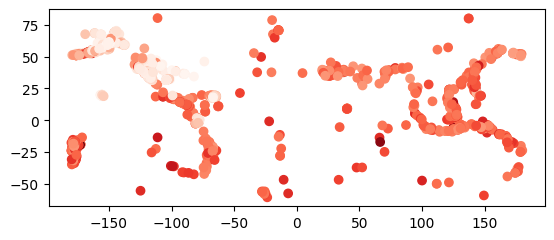

In [28]:
eq.plot("mag",cmap="Reds")